In [1]:
# importing basic libraries
import pandas as pd
import numpy as np

In [2]:
# importing resume dataset
df=pd.read_csv('final_merged_dataset2.csv')
df

,Resume,Category
0,Python Developer Python Developer Philadelphia...,Python_Developer
1,Python Developer Python Developer Python Devel...,Python_Developer
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python_Developer
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python_Developer
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python_Developer
...,...,...
8229,Oracle database administrator Oracle database ...,Database_Administrator
8230,"Job Seeker Columbus, OH I am responsible and d...",Database_Administrator
8231,Database Administrator Database Administrator ...,Database_Administrator
8232,Business Intelligence Engineer Business Intell...,Database_Administrator


In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess(resumeText):
    # Convert to lowercase
    resumeText = resumeText.lower()

    # Remove non-alphabetic characters and keep only letters and whitespaces
    resumeText = re.sub(r'[^a-zA-Z\s]', '', resumeText)

    # Remove URLs
    resumeText = re.sub('http\S+\s*', ' ', resumeText)

    # Remove 'RT' and 'cc'
    resumeText = re.sub('RT|cc', ' ', resumeText)

    # Remove punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)

    # Remove non-ASCII characters
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)

    # Remove extra whitespaces
    resumeText = re.sub('\s+', ' ', resumeText)


    # Tokenize the text
    words = word_tokenize(resumeText)

    # Remove stop words and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the words back into a clean resume text
    cleaned_resume = ' '.join(words)

    return cleaned_resume


In [4]:
df['cleaned_resume'] = df.Resume.apply(lambda x: preprocess(x))

In [5]:
df

,Resume,Category,cleaned_resume
0,Python Developer Python Developer Philadelphia...,Python_Developer,python developer python developer philadelphia...
1,Python Developer Python Developer Python Devel...,Python_Developer,python developer python developer python devel...
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python_Developer,rd engineer rd engineer rd engineer nokia solu...
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python_Developer,sr full stack developer sr full stack develope...
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python_Developer,sr full stack python developer sr full stack p...
...,...,...,...
8229,Oracle database administrator Oracle database ...,Database_Administrator,oracle database administrator oracle database ...
8230,"Job Seeker Columbus, OH I am responsible and d...",Database_Administrator,job seeker columbus oh responsible dependable ...
8231,Database Administrator Database Administrator ...,Database_Administrator,database administrator database administrator ...
8232,Business Intelligence Engineer Business Intell...,Database_Administrator,business intelligence engineer business intell...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Resume          8234 non-null   object
 1   Category        8234 non-null   object
 2   cleaned_resume  8234 non-null   object
dtypes: object(3)
memory usage: 193.1+ KB


In [7]:
df['Category'].unique()

array(['Python_Developer', 'Java_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Project_manager', 'Security_Analyst',
       'Software_Developer', 'Systems_Administrator', 'Web_Developer',
       'Database_Administrator'], dtype=object)

In [8]:
df['Category'].value_counts()

Category
Python_Developer          1278
Java_Developer            1242
Web_Developer              984
Database_Administrator     920
Security_Analyst           876
Systems_Administrator      776
Project_manager            722
Front_End_Developer        530
Network_Administrator      469
Software_Developer         437
Name: count, dtype: int64

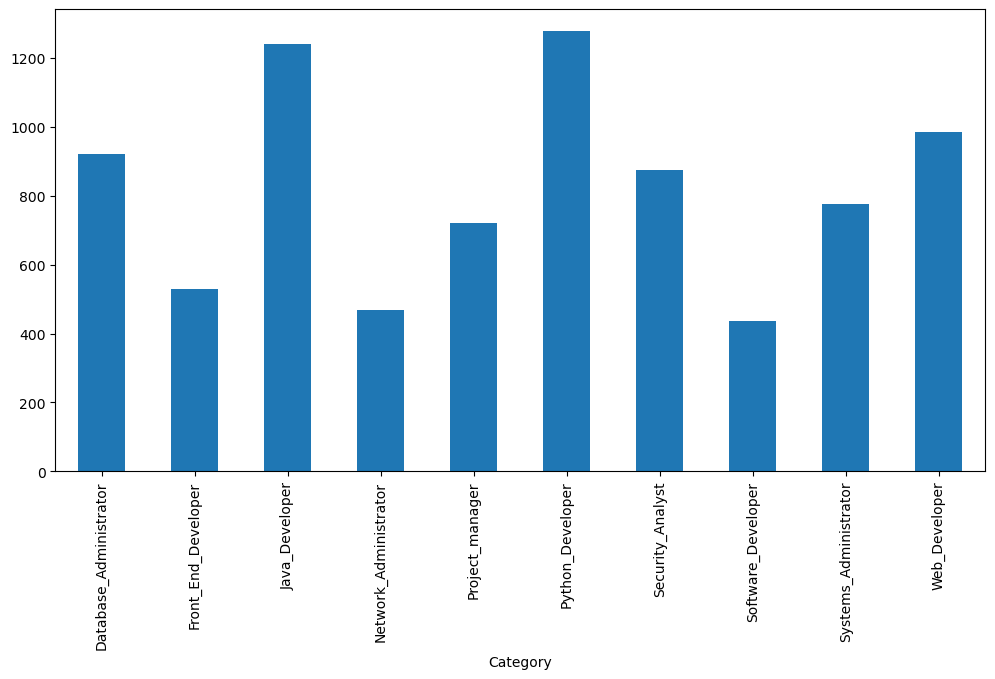

In [9]:
import matplotlib.pyplot as plt
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

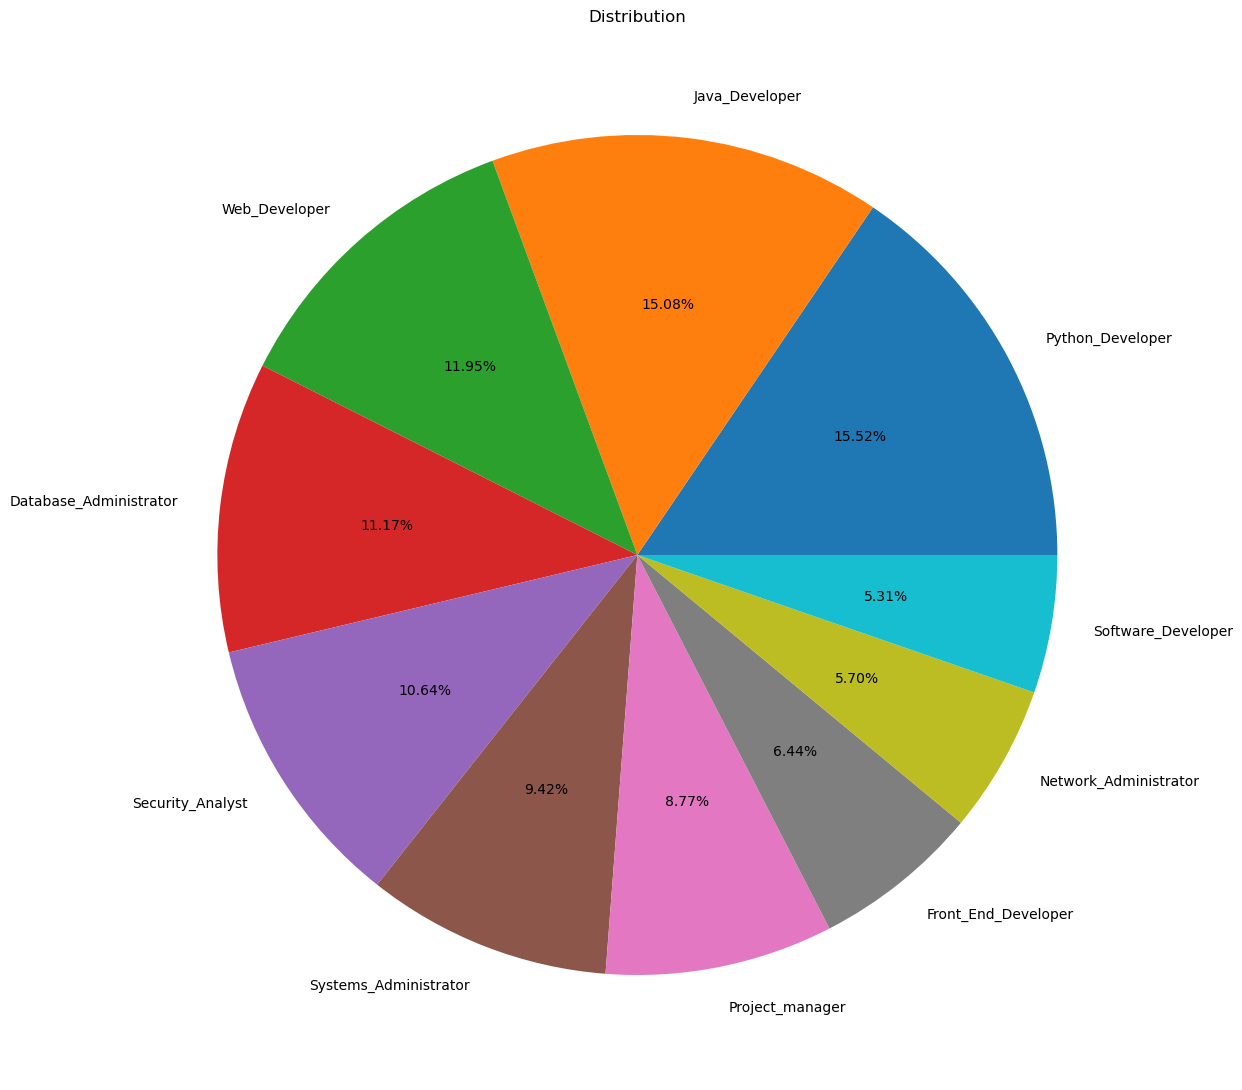

In [10]:
from matplotlib.gridspec import GridSpec
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(30,30))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [11]:
import numpy as np

class CustomLabelEncoder:
    def __init__(self):
        self.classes_ = None
        self.encoding_mapping_ = None
        self.inverse_mapping_ = None

    def fit(self, y):
        self.classes_ = np.unique(y)
        self.encoding_mapping_ = {label: index for index, label in enumerate(self.classes_)}
        self.inverse_mapping_ = {index: label for label, index in self.encoding_mapping_.items()}
        return self

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

    def get_metadata_routing(self):
        return MetadataRequest()

    def get_params(self, deep=True):
        return {"classes_": self.classes_}

    def inverse_transform(self, y):
        if self.inverse_mapping_ is None:
            raise ValueError("fit() must be called before inverse_transform()")
        return np.vectorize(self.inverse_mapping_.get)(y)

    def set_output(self, transform=None):
        return self

    def set_params(self, **params):
        if "classes_" in params:
            self.classes_ = params["classes_"]
            self.encoding_mapping_ = {label: index for index, label in enumerate(self.classes_)}
            self.inverse_mapping_ = {index: label for label, index in self.encoding_mapping_.items()}
        return self

    def transform(self, y):
        if self.encoding_mapping_ is None:
            raise ValueError("fit() must be called before transform()")
        return np.vectorize(self.encoding_mapping_.get)(y)

In [12]:
label_encoder_custom = CustomLabelEncoder()
df['Category'] = label_encoder_custom.fit_transform(df['Category'])

In [13]:
df

,Resume,Category,cleaned_resume
0,Python Developer Python Developer Philadelphia...,5,python developer python developer philadelphia...
1,Python Developer Python Developer Python Devel...,5,python developer python developer python devel...
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,5,rd engineer rd engineer rd engineer nokia solu...
3,Sr. Full Stack Developer Sr. Full Stack Develo...,5,sr full stack developer sr full stack develope...
4,Sr. Full Stack Python Developer Sr. Full Stack...,5,sr full stack python developer sr full stack p...
...,...,...,...
8229,Oracle database administrator Oracle database ...,0,oracle database administrator oracle database ...
8230,"Job Seeker Columbus, OH I am responsible and d...",0,job seeker columbus oh responsible dependable ...
8231,Database Administrator Database Administrator ...,0,database administrator database administrator ...
8232,Business Intelligence Engineer Business Intell...,0,business intelligence engineer business intell...


In [14]:
df['Category'].unique()

array([5, 2, 1, 3, 4, 6, 7, 8, 9, 0])

In [15]:
import math
from collections import Counter
from typing import List, Union

class TFIDF:
    def __init__(self, min_df=1, max_df=1.0, max_features=None):
        self.min_df = min_df
        self.max_df = max_df
        self.max_features = max_features
        self.documents = []
        self.vocabulary = {}
        self.idf = {}

    def fit(self, raw_documents: List[Union[str, bytes]]):
        # Tokenize and build term frequency for each document
        term_frequencies = []
        for doc in raw_documents:
            tokens = self.tokenize(doc)
            term_freq = Counter(tokens)
            term_frequencies.append(term_freq)

        # Build vocabulary based on document frequencies
        doc_count = len(raw_documents)
        for term_freq in term_frequencies:
            for term in term_freq:
                if term in self.vocabulary:
                    self.vocabulary[term] += 1
                else:
                    self.vocabulary[term] = 1

        # Filter vocabulary based on min_df and max_df
        self.vocabulary = {
            term: freq for term, freq in self.vocabulary.items()
            if self.min_df <= freq <= self.max_df * doc_count
        }

        # Sort vocabulary by frequency and apply max_features
        sorted_vocab = sorted(self.vocabulary.items(), key=lambda x: x[1], reverse=True)
        if self.max_features is not None:
            sorted_vocab = sorted_vocab[:self.max_features]
        self.vocabulary = dict(sorted_vocab)

        # Calculate inverse document frequency (IDF)
        for term in self.vocabulary:
            doc_freq = sum(1 for term_freq in term_frequencies if term in term_freq)
            self.idf[term] = math.log(doc_count / (1 + doc_freq))

    def transform(self, raw_documents: List[Union[str, bytes]]) -> List[List[float]]:
        # Transform documents to TF-IDF matrix
        tfidf_matrix = []
        for doc in raw_documents:
            tokens = self.tokenize(doc)
            term_freq = Counter(tokens)
            tfidf_vector = [self.calculate_tfidf(term, term_freq) for term in self.vocabulary]
            tfidf_matrix.append(tfidf_vector)

        return tfidf_matrix

    def calculate_tfidf(self, term: str, term_freq: Counter) -> float:
        # Calculate TF-IDF for a specific term in a document
        term_count = term_freq[term]

        # Handle the case where term has zero frequency
        if term_count == 0:
            return 0.0

        tf = term_count / sum(term_freq.values())
        idf = self.idf.get(term, 0.0)
        return tf * idf


    def tokenize(self, document: Union[str, bytes]) -> List[str]:
        # Simple tokenization function
        if isinstance(document, bytes):
            document = document.decode('utf-8')
        return document.lower().split()

    def get_feature_names_out(self) -> List[str]:
        # Get feature names corresponding to the columns of the TF-IDF matrix
        return list(self.vocabulary.keys())



In [16]:
# Instantiate custom TF-IDF vectorizer
tfidf_vectorizer_custom = TFIDF(max_features=800)
# tfidf_vectorizer_custom.fit(X_train_knn)
# X_train_tfidf_custom = tfidf_vectorizer_custom.transform(X_train_knn)
# X_test_tfidf_custom = tfidf_vectorizer_custom.transform(X_test_knn)

tfidf_vectorizer_custom.fit(df['cleaned_resume'])
tfidf_custom_matrix = tfidf_vectorizer_custom.transform(df['cleaned_resume'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_custom_matrix, df['Category'], test_size=0.2, random_state=42)

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
import pandas as pd

# Assuming X_train and y_train are lists
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

# Reset indices
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


In [20]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
    def score(self, X, y):
        y_pred = self.predict(X)

        # Calculate accuracy 
        accuracy = np.sum(y_pred == y) / len(y)

        return accuracy

In [21]:
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)

In [22]:
clf = KNN(k=5)
clf.fit(X_train.values, y_train.tolist())
predictions = clf.predict(X_test.values)

In [23]:
acc = clf.score(X_test.values,y_test)
acc

0.8337378640776699

In [24]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.8337378640776699


In [25]:
hyperparameter_values = [1, 3, 5, 7, 9]

# Perform hyperparameter tuning using the validation set
best_accuracy = 0
best_k = hyperparameter_values[0]  # Initialize to the first value

for k in hyperparameter_values:
    knn = KNN(k=k)
    knn.fit(X_train.values, y_train.tolist())
    val_accuracy = knn.score(X_val.values, y_val)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_k = k

print("Best K for Validation Set:", best_k)
print("Best Accuracy on Validation Set:", best_accuracy)

# Train the final model using the best hyperparameters on the combined training and validation sets
best_knn_model = KNN(k=best_k)
best_knn_model.fit(np.concatenate([X_train.values, X_val.values]), np.concatenate([y_train.tolist(), y_val.tolist()]))

# Evaluate the final model on the test set
test_accuracy = best_knn_model.score(X_test.values, y_test)
print("Test Accuracy using Best Hyperparameters:", test_accuracy)

Best K for Validation Set: 9
Best Accuracy on Validation Set: 0.8286755771567437
Test Accuracy using Best Hyperparameters: 0.8398058252427184


In [26]:
import pickle
# Save the trained models and transformers
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)

with open('vectorizerTFIDF.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer_custom, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_custom, file)

In [27]:
new_data = """Zara Davenport
zara@davenport.com
•
(567) 890-2345
•
linkedin.com/in/zara-davenport
•
@zara.davenport
Python Developer
Python Developer with a proven track record of developing and deploying web applications that resulted in a 25% increase in user engagement and a 20% increase in revenue. Skilled in optimizing code for performance and scalability, reducing page load times by 40% and supporting a 50% increase in traffic. A mentor to junior developers, resulting in a 30% improvement in code quality and a 15% increase in team productivity.
WORK EXPERIENCE
Python Developer
01/2023 – 04/2023
PythonDevPro LLC
Developed and deployed a Python-based web application that integrated data from multiple sources, resulting in a 25% increase in user engagement and a 20% increase in revenue.
Optimized code for performance and scalability, reducing page load times by 40% and supporting a 50% increase in traffic.
Mentored junior developers and provided technical guidance, resulting in a 30% improvement in code quality and a 15% increase in team productivity.
Software Developer
09/2022 – 12/2022
PythonPro Developers
Collaborated with cross-functional teams to design and develop a RESTful API that integrated with multiple third-party systems, resulting in a 30% increase in data accuracy and a 25% reduction in manual data entry.
Wrote and executed unit tests and integration tests, ensuring code quality and reducing the number of production issues by 40%.
Contributed to open-source projects and communities, gaining recognition and building a strong professional network within the Python development community.
Python Software Developer
07/2022 – 09/2022
PythonDeveloper Masters
Developed and maintained a Python-based software system that processed and analyzed large datasets, resulting in a 50% reduction in data processing time and a 40% increase in data accuracy.
Troubleshot and debugged issues in existing codebase, reducing the number of production issues by 30% and improving system reliability by 25%.
Stayed up-to-date with emerging trends and technologies in Python development, implementing new tools and techniques that improved team efficiency by 20%.
SKILLS & COMPETENCIES
Python programming
Web application development
Data integration
Performance optimization
Scalability
Code quality
Team mentoring
RESTful API design
Unit testing
Integration testing
Open-source contribution
Data processing
Data analysis
Troubleshooting
Debugging
Emerging trends and technologies
Software maintenance
Cross-functional collaboration
Professional networking
COURSES / CERTIFICATIONS
Python Institute - Certified Entry-Level Python Programmer (PCEP)
06/2023
Python Institute
Microsoft Certified: Python Developer Associate (98-381)
06/2022
Microsoft
Certification 3 for Python Developer: OpenEDG Python Institute - Certified Associate in Python Programming (PCAP)
06/2021
OpenEDG Python Institute
EDUCATION
Bachelor of Science in Computer Science with a focus on software development or programming.
2018-2022
Rochester Institute of Technology
,
Rochester, NY
Computer Science
Applied Mathematics

   """

In [28]:
cleaned_new_data = preprocess(new_data)

In [29]:
X_new_tfidf_knn = tfidf_vectorizer_custom.transform([cleaned_new_data])

In [30]:
y_pred_new_knn = best_knn_model.predict(X_new_tfidf_knn)


In [31]:
y_pred_original_new_knn = label_encoder_custom.inverse_transform(y_pred_new_knn)

In [32]:
y_pred_original_new_knn[0]

'Python_Developer'

In [33]:
df_job = pd.read_csv('input/resume-and-job-description/training_data.csv')

In [34]:
df_job = df_job.drop(['company_name','description_length','model_response'],axis=1)

In [35]:
df_job['job_description'] = df_job['job_description'].apply(lambda x: preprocess(x))

In [36]:
X_job_desc_tfidf_cosine = tfidf_vectorizer_custom.transform(df_job['job_description'])

In [53]:
import numpy as np

def cosine_similarity(X, Y=None):
    # If Y is not provided, compute pairwise similarity for X
    if Y is None:
        Y = X

    # Compute dot product
    dot_product = np.dot(X, Y.T)

    # Compute L2 norms
    norm_X = np.linalg.norm(X, axis=1)
    norm_Y = np.linalg.norm(Y, axis=1)

    # Compute cosine similarity
    similarity = dot_product / (np.outer(norm_X, norm_Y) + 1e-8)  # Adding a small epsilon to avoid division by zero

    return similarity

In [59]:
df['original']= label_encoder_custom.inverse_transform(df['Category'])

In [60]:
result_dfs = []

# Iterate over the first 15 job descriptions
for i, job_desc_emb in enumerate(X_job_desc_tfidf_cosine[:15]):
     # Convert job_desc_emb to a NumPy array
    job_desc_emb = np.array(job_desc_emb)
    
    # Reshape the array
    job_desc_emb_2d = job_desc_emb.reshape(1, -1)
    similarities = cosine_similarity(job_desc_emb_2d, X_train)
    top_k_indices = np.argsort(similarities[0])[::-1][:5]
    
    # Create a list to collect rows
    rows = []
    
    for j in top_k_indices:
        rows.append({'jobId': i,
                     'similarity': similarities[0][j],
                     'domainResume': df['original'].iloc[j],
                     'domainDesc': df_job['position_title'].iloc[i]})

    # Create the DataFrame using pd.DataFrame
    result_df = pd.DataFrame(rows, columns=['jobId', 'similarity', 'domainResume', 'domainDesc'])
    result_df = result_df.sort_values(by='similarity', ascending=False)
    result_dfs.append(result_df)

# Display the result DataFrames
for i, result_df in enumerate(result_dfs):
    print(f"\nTop 5 matching resumes for Job ID {i}:")
    print(result_df)



Top 5 matching resumes for Job ID 0:
   jobId  similarity           domainResume        domainDesc
0      0    0.472683       Security_Analyst  Sales Specialist
1      0    0.459271       Python_Developer  Sales Specialist
2      0    0.394681       Python_Developer  Sales Specialist
3      0    0.375556  Network_Administrator  Sales Specialist
4      0    0.364620  Systems_Administrator  Sales Specialist

Top 5 matching resumes for Job ID 1:
   jobId  similarity        domainResume                  domainDesc
0      1    0.530596      Java_Developer  Apple Solutions Consultant
1      1    0.476008    Python_Developer  Apple Solutions Consultant
2      1    0.427480  Software_Developer  Apple Solutions Consultant
3      1    0.411177    Python_Developer  Apple Solutions Consultant
4      1    0.384531    Python_Developer  Apple Solutions Consultant

Top 5 matching resumes for Job ID 2:
   jobId  similarity         domainResume  \
0      2    0.400575       Java_Developer   
1      2  

In [69]:
new_data1 = """ John Database Expert

Contact Information:

Email: john.database@example.com
Phone: (555) 123-4567
LinkedIn: linkedin.com/in/johndatabase
GitHub: github.com/johndatabase
Summary:
Dedicated and skilled Database Administrator with over 3 years of experience in managing multiple MS SQL 2016 databases on large systems. Committed to advancing a sustainable energy future through efficient data management. Proven expertise in database creation, optimization, and troubleshooting. Adept at collaborating with cross-functional teams to ensure seamless database performance and data security.

Professional Experience:

Hitachi Energy Solutions, Anytown, USA (January 2021 - Present)
Database Administrator

Database Creation and Maintenance:
Defined and modeled data requirements, creating and updating databases to meet organizational needs.
Performance Monitoring and Optimization:
Monitored database performance, ensuring optimal functionality at all levels.
Detected and troubleshooted SQL Server-related issues, enhancing overall performance.
Backup, Recovery & Security:
Coordinated with the IT team to develop comprehensive backup and recovery plans.
Identified potential risks and implemented measures to minimize database software risks.
Guidance and Support:
Provided first-level support for database-related issues, aiding team members.
Assisted team in adopting new features from updated database versions.
Identified framework gaps, designed solutions, and enhanced the overall framework.
Monitoring and Review:
Mentored and monitored junior team members, improving team efficiency.
Conducted regular code reviews to ensure high-quality standards.
Education:

Bachelor of Science in Computer Engineering
University of Technology, Anytown, USA (Graduated May 2018)

Skills:

Performance Tuning and Query Optimization
Index Management, Integrity Checks, Statistics, Configuration
Troubleshooting SQL Server-related Issues (CPU, memory, I/O, disk space)
Backup, Restores, Recovery Models, Database Shrink Operations
Clustering, Database Mirroring, Replication, Partitioning
Proficient in SQL Server Tools (Profiler, SSMS, PerfMon, DMVs, System Sprocs)
SQL Development: Writing and Troubleshooting SQL Code
Excellent Verbal and Written Communication Skills
Documentation Skills for Processes and Procedures
Strong Multitasking Abilities and Team Player
Personal Attributes:

Proven ability to work under pressure
Passionate about innovation and continuous learning
Commitment to diversity and collaboration for great innovation   """

In [70]:
job_desc = """About the job
At Hitachi Energy our purpose is advancing a sustainable energy future for all. We bring power to our homes, schools, hospitals, and factories. Join us and work with fantastic people, while learning and developing yourself on projects that have a real impact to our communities and society. Bring your passion, bring your energy, and be part of a global team that appreciates a simple truth: Diversity + Collaboration = Great Innovation


The main purpose of the job is to create new and update existing databases, store, and organize data, manage database servers, detect, and troubleshoot resource contention and get involved in database optimization and monitoring.


Job Responsibilities: 

1. Create and update databases
• Define and model data requirements.
• Create new and update existing databases as per the requirement.


2. Performance monitoring
• Monitor the database performance and verify that it is running properly at all levels.
• Troubleshoot if any kind of performance issue arises


3.Database backup, recovery& security
• Coordinate with the IT team to create backup and recovery plans and procedures.
• Identify the potential risk of database software and work towards minimizing those risks.


4.Provide guidance and support
• Provide first level of support for any database related issues raised by team members.
• Help team members to adopt new features provided by newer database versions.
• Identify database framework gaps and design solution to fix the gaps and enhance the framework.


5. Monitor and review
• Mentor and monitor juniors on database related tasks to improve team efficiency.
• Conduct regular code review of team members.


6.Ownership of Projects/Assigned Tasks
• Take ownership of projects for its timely delivery including planning, estimation, development approach, assignment, reporting, etc.


Job Specification:



Education Level and Experience Required:
• Minimum of bachelor's degree in computer engineering or equivalent.
• 2+ years of experience in Database Administration and managing multiple MS SQL 2016 (or higher) RDBMS on large systems.


Skills and competencies:
• Experience in Performance Tuning and Query Optimization.
• Knowledge of index management, integrity checks, statistics, configuration.
• Ability to detect and troubleshoot SQL Server related CPU, memory, I/O, disk space and other resource contention.
• Knowledge of backups, restores, recovery models, database shrink operations, DBCC commands, Clustering, Database mirroring, Replication, Partitioning.
• Knowledge of SQL Server tools (Profiler, SSMS, PerfMon, DMVs, and system sprocs).
• SQL Development – ability to write and troubleshoot SQL Code and design.
• Excellent verbal /written communication skills, Documentation skills for processes and procedures.
• A multitasker, and team player who has patience and ability to handle job pressure."""

In [71]:
clean_job = preprocess(job_desc)
clean_new = preprocess(new_data1)

In [72]:
X_resume_tfidf_new_cosine = tfidf_vectorizer_custom.transform([clean_new])
X_job_desc_tfidf_new_cosine = tfidf_vectorizer_custom.transform([clean_job])

In [73]:
similarity_scores_new_cosine = cosine_similarity(X_resume_tfidf_new_cosine, X_job_desc_tfidf_new_cosine)

In [74]:
similarity_scores_new_cosine[0][0]

0.5331588049739918